# Plotting the flux space

There are different ways to visualize the space of feasible steady-state flux vectors. The two most popular plot types are production envelops and yield spaces. StrainDesign provides functions for both of these plot types, but additionally support plotting of arbitrary other projections or mappings of rate and yield terms. We again use the e_coli_core example for demonstration purposes.

In [2]:
import cobra
import straindesign as sd
model = cobra.io.load_model('e_coli_core')

Set parameter Username
Academic license - for non-commercial use only - expires 2022-07-13


## Production Envelopes

Production envelopes project the solution space of steady-state flux vectors onto the dimensions of growth rate and product synthesis rate. Such a plot can be generated by:

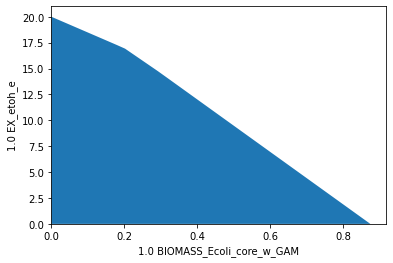

In [5]:
sd.plot_flux_space(model,('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'));

Again, arbitrary constraints can be applied to the flux space to plot subspaces. Here, we plot the flux space within a small range of oxygen uptakes ($1\,-\,2\,mmol_\,g_{CDW}^-1h^-1$). Within this

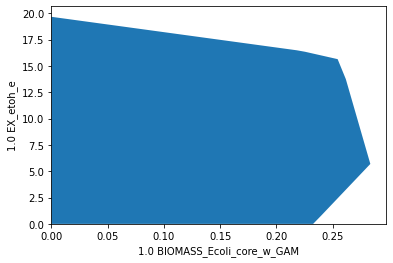

In [4]:
sd.plot_flux_space(model,('BIOMASS_Ecoli_core_w_GAM','EX_etoh_e'),constraints=['-EX_o2_e >= 1', '-EX_o2_e <= 2']);

## Yield Spaces

## Mixed Plots